In [ ]:
def graph_process(config_path):
    cluster_unify = []
    partial_order = []
    start_candidates = []
    end_candidates = []
    
    f = open(config_path, 'r')
    while True:
        line = f.readline()
        if '=' in line:
            unify = list(map(int, line.split('=')))
            cluster_unify.append(unify)
        elif '<' in line:
            order = list(map(int, line.split('<')))
            partial_order.append(order)
            start_candidates.append(order[0])
            end_candidates.append(order[1])
            
        if not line: break
    f.close()
        
    start = []
    end = []
    for element in start_candidates:
        if element in end_candidates:
            continue
        start.append(element)
    
    for element in end_candidates:
        if element in start_candidates:
            continue
        end.append(element)
    
    start = list(set(start))
    end = list(set(end))
    return start, end, partial_order, cluster_unify

graph_config = '/Users/gongshukai/Desktop/SCHOOL WORK/RUC_Junior_Sem1/parallel_computing/parallel_computing_project/选题3： 基于卫星大数据和AI的统计指标估计分析（应经数科，大数据，统计拔尖）/development-measure/graph_config/nk.txt'
start, end, partial_order, cluster_unify = graph_process(graph_config)
print(f'start: {start}')
print(f'end: {end}')
print(f'partial_order: {partial_order}')
print(f'cluster_unify: {cluster_unify}')
    
cluster_number=22

import glob
import numpy as np

from graph import *
from siScore_utils import *

def make_data_loader(cluster_list, batch_sz):
    cluster_dataset = ClusterDataset(cluster_list, dir_name = 'cluster_nk_11_11', transform = transforms.Compose([
                                       RandomRotate(),
                                       ToTensor(),
                                       Grayscale(prob = 1.0),
                                       Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                    ]))
    print(f'length of cluster_dataset: {cluster_dataset.__len__()}')
    cluster_loader = torch.utils.data.DataLoader(cluster_dataset, batch_size=batch_sz, shuffle=True, num_workers=4, drop_last=True)
    return cluster_loader

def generate_loader_dict(total_list, unified_cluster_list, batch_sz):
    loader_dict = {}
    for cluster_id in total_list:
        cluster_loader = make_data_loader([cluster_id], batch_sz)
        loader_dict[cluster_id] = cluster_loader        
    
    for cluster_tuple in unified_cluster_list:
        cluster_loader = make_data_loader(cluster_tuple, batch_sz)
        for cluster_num in cluster_tuple:
            loader_dict[cluster_num] = cluster_loader
    return loader_dict

loader_list = generate_loader_dict(range(cluster_number), cluster_unify, batch_sz=16)
for key in loader_list:
    print(f'key: {key}, length: {len(loader_list[key])}')

start: [22]
end: [1]
partial_order: [[0, 1], [5, 0], [14, 5], [17, 14], [13, 17], [12, 13], [19, 12], [22, 19]]
cluster_unify: [[1, 2, 3, 4, 6], [0, 7], [5, 8, 9, 10], [14, 15, 16, 20], [17, 21], [13, 18], [11, 12]]
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 50
length of cluster_dataset: 250
length of cluster_dataset: 100
length of cluster_dataset: 200
length of cluster_dataset: 200


In [3]:
cluster_graph = generate_graph(partial_order, cluster_number)
print(cluster_graph.graph)
print(cluster_graph.V)
cluster_path_list = cluster_graph.printPaths([19], end)
print(cluster_path_list)

defaultdict(<class 'list'>, {0: [1], 5: [0], 14: [5], 17: [14], 13: [17], 12: [13], 19: [12], 22: [19]})
22
[[19, 12, 13, 17, 14, 5, 0, 1]]


torch.Size([128, 3, 256, 256])
torch.Size([128])
Before: img_A1:tensor([[[-2.1179e+00, -2.1179e+00, -2.1179e+00,  ..., -2.1179e+00,
          -2.1179e+00, -2.1179e+00],
         [-1.0562e+00, -1.0562e+00, -1.0505e+00,  ..., -1.0390e+00,
          -1.0333e+00, -1.0276e+00],
         [-6.1663e-01, -6.1093e-01, -6.1663e-01,  ..., -5.9951e-01,
          -5.8809e-01, -5.8238e-01],
         ...,
         [-7.3080e-01, -7.3651e-01, -7.4792e-01,  ..., -3.5976e-01,
          -3.7118e-01, -3.7689e-01],
         [-7.0226e-01, -7.1938e-01, -7.5934e-01,  ..., -2.7414e-01,
          -3.4835e-01, -3.8830e-01],
         [-7.2509e-01, -7.2509e-01, -7.3651e-01,  ..., -1.2572e-01,
          -2.6843e-01, -3.4264e-01]],

        [[-2.0357e+00, -2.0357e+00, -2.0357e+00,  ..., -2.0357e+00,
          -2.0357e+00, -2.0357e+00],
         [-9.5028e-01, -9.5028e-01, -9.4444e-01,  ..., -9.3277e-01,
          -9.2694e-01, -9.2110e-01],
         [-5.0093e-01, -4.9510e-01, -5.0093e-01,  ..., -4.8343e-01,
          -4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


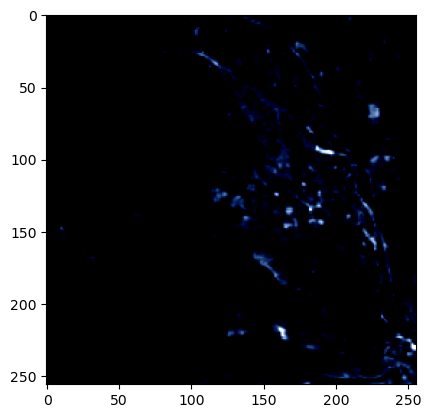

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


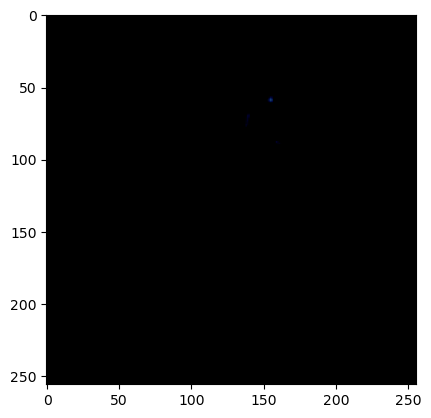

After: img_A1[:, :int(lam*256),:] = 0: tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int32)


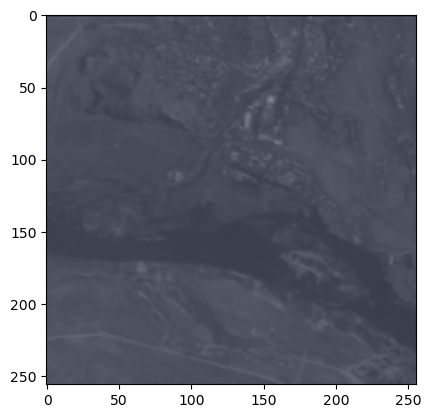

In [6]:
import copy
from matplotlib import pyplot as plt
dataloaders = []
cluster_path = [19, 12, 13, 17, 14, 5, 0, 1]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for cluster_id in cluster_path:
    # 使用的dataloader, dataloaders = [DataLoader22, DataLoader19, ..., DataLoader1]
    dataloaders.append(loader_list[cluster_id])
    
for batch_idx, data in enumerate(zip(*dataloaders)):
    lam = np.random.beta(1.0, 1.0)  # 采样Beta分布的随机数lam，用于图片混合。
    cluster_num = len(data) # cluster_num = len(data) = 9，因为data是一个长度为9的元组
    data_zip = torch.cat(data, 0).to(device)
    print(data_zip.shape)
    idx_A = torch.randperm(data_zip.shape[0])
    idx_B = torch.randperm(data_zip.shape[0])
    print(idx_A.shape)
    img_A1 = copy.deepcopy(data_zip[idx_A, :, :])
    img_B1 = copy.deepcopy(data_zip[idx_B, :, :])
    print(f'Before: img_A1:{img_A1[3]}')
    print(int(lam*256))
    # show image A1 and B1
    imgA1 = img_A1[3].cpu().numpy().transpose(1,2,0)
    imgB1 = img_B1[3].cpu().numpy().transpose(1,2,0)
    
    plt.imshow(imgA1)
    plt.show()
    plt.imshow(imgB1)
    plt.show()

    img_A1[:, :int(lam*256),:] = 0
    print(f'After: img_A1[:, :int(lam*256),:] = 0: {img_A1[3]}')
    img_B1[:, int(lam*256):,:] = 0
    img_M1 = img_A1 + img_B1

    # show image M1
    imgM1 = img_M1[3].cpu().numpy().transpose(1,2,0)
    img_M1 = (img_M1 * 0.229 + 0.485) * 255
    img_M1 = img_M1.int()
    plt.imshow(imgM1)

    break

In [12]:
file_list = glob.glob('../data/'+'NK'+'/*/*/*.png')
file_list

['../data/NK/nk_2017/0/6271_13991.png',
 '../data/NK/nk_2017/0/6265_13991.png',
 '../data/NK/nk_2017/0/6268_13986.png',
 '../data/NK/nk_2017/0/6268_13992.png',
 '../data/NK/nk_2017/0/6268_13993.png',
 '../data/NK/nk_2017/0/6268_13987.png',
 '../data/NK/nk_2017/0/6265_13990.png',
 '../data/NK/nk_2017/0/6271_13990.png',
 '../data/NK/nk_2017/0/6260_13989.png',
 '../data/NK/nk_2017/0/6271_13992.png',
 '../data/NK/nk_2017/0/6265_13992.png',
 '../data/NK/nk_2017/0/6265_13986.png',
 '../data/NK/nk_2017/0/6268_13991.png',
 '../data/NK/nk_2017/0/6268_13985.png',
 '../data/NK/nk_2017/0/6268_13990.png',
 '../data/NK/nk_2017/0/6265_13987.png',
 '../data/NK/nk_2017/0/6265_13993.png',
 '../data/NK/nk_2017/0/6271_13993.png',
 '../data/NK/nk_2017/0/6271_13987.png',
 '../data/NK/nk_2017/0/6263_13990.png',
 '../data/NK/nk_2017/0/6268_13994.png',
 '../data/NK/nk_2017/0/6268_13995.png',
 '../data/NK/nk_2017/0/6263_13991.png',
 '../data/NK/nk_2017/0/6271_13994.png',
 '../data/NK/nk_2017/0/6272_13988.png',


# Aggregating Rank

In [64]:
from collections import defaultdict

def calculate_rankings(pog_str):
    # 解析输入的POG字符串
    clusters = pog_str.split('>')
    rank = {}
    adj_rank = {}
    
    # 为每个聚类分配一个排名
    rank_count = 1
    for idx, group in enumerate(clusters):
        # 获取该组的聚类
        group_clusters = group.split('=')
        for cluster in group_clusters:
            rank[int(cluster)] = rank_count
        rank_count += 1

    # 返回一个向量，表示从聚类0到聚类n-1的排名
    rank_vec = [rank[cluster] for cluster in sorted(rank.keys())]

    # 计算调整后的排名（adj_rank），如果两个聚类相等，则rank是相同的
    reverse_rank = defaultdict(list)
    for cluster, r in rank.items():
        reverse_rank[r].append(cluster)

    for r in sorted(reverse_rank.keys()):
        for cluster in reverse_rank[r]:
            adj_rank[cluster] = rank[cluster]+1/2*(len(reverse_rank[r])-1)
    adj_rank_vec = [adj_rank[cluster] for cluster in sorted(adj_rank.keys())]
    return rank_vec, adj_rank_vec


# 输入POG字符串
pog1 = '3=4=6>1=2=7>0>5=8=9>10>14=16=20>15=18>11=13>12=17=19>21'
pog2 = '3>4=6>0=1=2=7>8=10>5=9>14=15=21>16=20>11=12=13=17=18>19'
pog3 = '1=2=3=4=6>7>0>5=8>9=10>14=16=20>11=13=15=18>12=17>19=21'
pog4 = '6>2=3=5>1=4=7=9>0>8=10>15=17=21>14>13=16=20>12=19>11=18'
pog5 = '4>0=1=2=6=7=9=16>3>5=8=10=14>12=13=21>11=15=17=18=19=20'
pog6 = '3=6>1>0=2=4=9>7=8>5>10>14=16>17>15=20>18>19=21>12>11>13'
pog7 = '6>2=3=4>0=1=9>5=7>8=10>16>14>20>15>13=17=18>11=12=19>21'
pog8 = '0=1=2=3=4>5=6>9>7>8=10>14=15=16>21>11=12=13=17=18=19=20'
pog9 = '1=2>7>3>0>4>6>9>8>10>5>20>14=16>12=13>15>11=17>18>19=21'
pog10 = '2=3=4>0=1=6>7=9>8>5=10>15=17=21>14=16=18=20>11=12=13=19'


# 计算排名
print(calculate_rankings(pog1)[1])

adj_ranks = []
for idx in range(10):
    pog_str = eval(f'pog{idx+1}')
    rank_vec, adj_rank_vec = calculate_rankings(pog_str)
    adj_ranks.append(adj_rank_vec)

import numpy
adj_ranks = numpy.array(adj_ranks)

adj_ranks


[3.0, 3.0, 3.0, 2.0, 2.0, 5.0, 2.0, 3.0, 5.0, 5.0, 5.0, 8.5, 10.0, 8.5, 7.0, 7.5, 7.0, 10.0, 7.5, 10.0, 7.0, 10.0]


array([[ 3. ,  3. ,  3. ,  2. ,  2. ,  5. ,  2. ,  3. ,  5. ,  5. ,  5. ,
         8.5, 10. ,  8.5,  7. ,  7.5,  7. , 10. ,  7.5, 10. ,  7. , 10. ],
       [ 4.5,  4.5,  4.5,  1. ,  2.5,  5.5,  2.5,  4.5,  4.5,  5.5,  4.5,
        10. , 10. , 10. ,  7. ,  7. ,  7.5, 10. , 10. ,  9. ,  7.5,  7. ],
       [ 3. ,  3. ,  3. ,  3. ,  3. ,  4.5,  3. ,  2. ,  4.5,  5.5,  5.5,
         8.5,  8.5,  8.5,  7. ,  8.5,  7. ,  8.5,  8.5,  9.5,  7. ,  9.5],
       [ 4. ,  4.5,  3. ,  3. ,  4.5,  3. ,  1. ,  4.5,  5.5,  4.5,  5.5,
        10.5,  9.5,  9. ,  7. ,  7. ,  9. ,  7. , 10.5,  9.5,  9. ,  7. ],
       [ 5. ,  5. ,  5. ,  3. ,  1. ,  5.5,  5. ,  5. ,  5.5,  5. ,  5.5,
         8.5,  6. ,  6. ,  5.5,  8.5,  5. ,  8.5,  8.5,  8.5,  8.5,  6. ],
       [ 4.5,  2. ,  4.5,  1.5,  4.5,  5. ,  1.5,  4.5,  4.5,  4.5,  6. ,
        13. , 12. , 14. ,  7.5,  9.5,  7.5,  8. , 10. , 11.5,  9.5, 11.5],
       [ 4. ,  4. ,  3. ,  3. ,  3. ,  4.5,  1. ,  4.5,  5.5,  4. ,  5.5,
        12. , 12. , 11. ,  7. , 

In [93]:
import numpy as np
from sklearn.cluster import KMeans

def pog_ensemble(pog_ranks: np.ndarray, sigma: float, epsilon: float, 
                 k: int, eta: float) -> np.ndarray:
    """
    聚合多个POG向量，使用Welsch函数计算权重，直到结果收敛。
    
    Parameters:
    pog_ranks (np.ndarray): 形状为 (M, N) 的POG矩阵，其中M是POG的数量，N是每个POG的维度。
    sigma (float): Welsch函数的超参数sigma，用于计算权重。
    epsilon (float): 收敛阈值，当误差小于epsilon时停止迭代。
    
    Returns:
    np.ndarray: 聚合后的POG向量。
    """
    # 获取POG矩阵的维度
    M, N = pog_ranks.shape

    # 初始化R*为POG向量的平均值
    R_star = np.mean(pog_ranks, axis=0)
    
    # 迭代直到收敛
    while True:
        # 计算每个POG的alpha_m
        alphas = np.zeros(M)
        for m in range(M):
            dist = np.linalg.norm(pog_ranks[m] - R_star)  # 计算欧几里得距离 ||R_m - R*||_2
            alphas[m] = 1 - np.exp(-dist**2 / sigma**2)  # 使用Welsch函数计算alpha_m

        # 计算权重w_m
        sum_alpha = np.sum(alphas)
        w_m = alphas / sum_alpha  # 归一化权重
        # 计算误差err
        R_star_new = np.sum(w_m[:, np.newaxis] * pog_ranks, axis=0)  # 计算加权聚合结果
        
        err = np.linalg.norm(R_star_new - R_star)  # 计算误差 ||R^* - Σw_m R_m||_2

        # 如果误差小于epsilon，则停止迭代
        if err < epsilon:
            break
        
        # 更新R*为新的聚合结果
        R_star = R_star_new
    
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(R_star.reshape(-1, 1))
    labels = kmeans.labels_
    # 按照labels，将相同类别的聚类组合。聚类的编号为R_star中的索引
    # 例如[1 1 1 4 4 3 4 1 3 3 3 2 2 2 0 0 0 2 2 2 0 2]
    # 将 0，1，2，7合并为一类，3，4，6合并为一类，5，8，9，10合并为一类，11，12，13，17，18，19，21合并为一类，14，15，16，20合并为一类
    
    pog = {}
    for idx, label in enumerate(labels):
        if label in pog:
            pog[label].append(idx)
        else:
            pog[label] = [idx]
    avg_rank = {}
    for key in pog:
        avg_rank[key] = np.mean([R_star[i] for i in pog[key]])
    # 根据avg_rank，对pog的键值对进行排序，avg小的键值对排在前面，输出一个和pog一样的字典，只是键值对按照avg_rank排序
    sorted_pog = dict(sorted(pog.items(), key=lambda x: avg_rank[x[0]]))
    # 1=2=3=4=6 > 0=7 > 5=8=9=10 > 14=15=16=20 > 17=21 > 13=18 > 11=12 > 19 > 22
    # 计算每个聚类组的平均排名
    return R_star, sorted_pog

# 示例调用：
pog_ranks = adj_ranks  # 假设有10条POG，每条POG是长度为22的向量

# 计算聚合后的POG
aggregated_pog, sorted_pog = pog_ensemble(pog_ranks, sigma=0.1, epsilon=1e-6, k=10, eta=0.5)

print("Aggregated POG:", aggregated_pog)
print("Sorted POG:", sorted_pog)
sorted_pog_str = ''
for i in sorted_pog.keys():
    sorted_pog_str += '='.join([str(j) for j in sorted_pog[i]]) + '>'
sorted_pog_str += '22'

print(f'aggregat_pog: {sorted_pog_str}')
print('ground_truth: 1=2=3=4=6>0=7>5=8=9=10>14=15=16=20>17=21>13=18>11=12>19>22')

# print(aggregated_pog.reshape(-1,1))

Aggregated POG: [ 3.8   3.35  3.25  2.45  3.05  5.1   2.75  3.75  5.25  4.75  5.75 10.7
 10.2  10.1   7.6   8.5   7.7   9.65 10.15 10.8   8.7   9.45]
Sorted POG: {4: [3, 6], 6: [1, 2, 4], 1: [0, 7], 3: [5, 8, 9], 9: [10], 2: [14, 16], 5: [15, 20], 7: [17, 21], 0: [12, 13, 18], 8: [11, 19]}
aggregat_pog: 3=6>1=2=4>0=7>5=8=9>10>14=16>15=20>17=21>12=13=18>11=19>22
ground_truth: 1=2=3=4=6>0=7>5=8=9=10>14=15=16=20>17=21>13=18>11=12>19>22


/opt/miniconda3/envs/new_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
